# The Basics: Python and Numpy

This is a Jupyter Notebook an interactive python environment in which you can additionally display text and LaTeX. It is important that you are using python3 as your kernel: the programming language which will be used to run your code blocks. Execute the following code block by clicking on it and pressing Shift-Return on your keyboard. If you are using python3, the result will begin with 3.X.X (this is 3.11.4 on my machine):

In [1]:
import sys
print(sys.version)

3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]


**Note:** this entire notebook can be run with a single press of the double-right-arrow button in the menu bar above. This will restart the "kernel" (the name for your current Python environment) and run all code blocks in sequence.

### Code Execution
Now let's try running some simple plotting code to see if everything installed properly. Click on the box below and press `Shift-Return` again. You should see a plot appear after a short while.

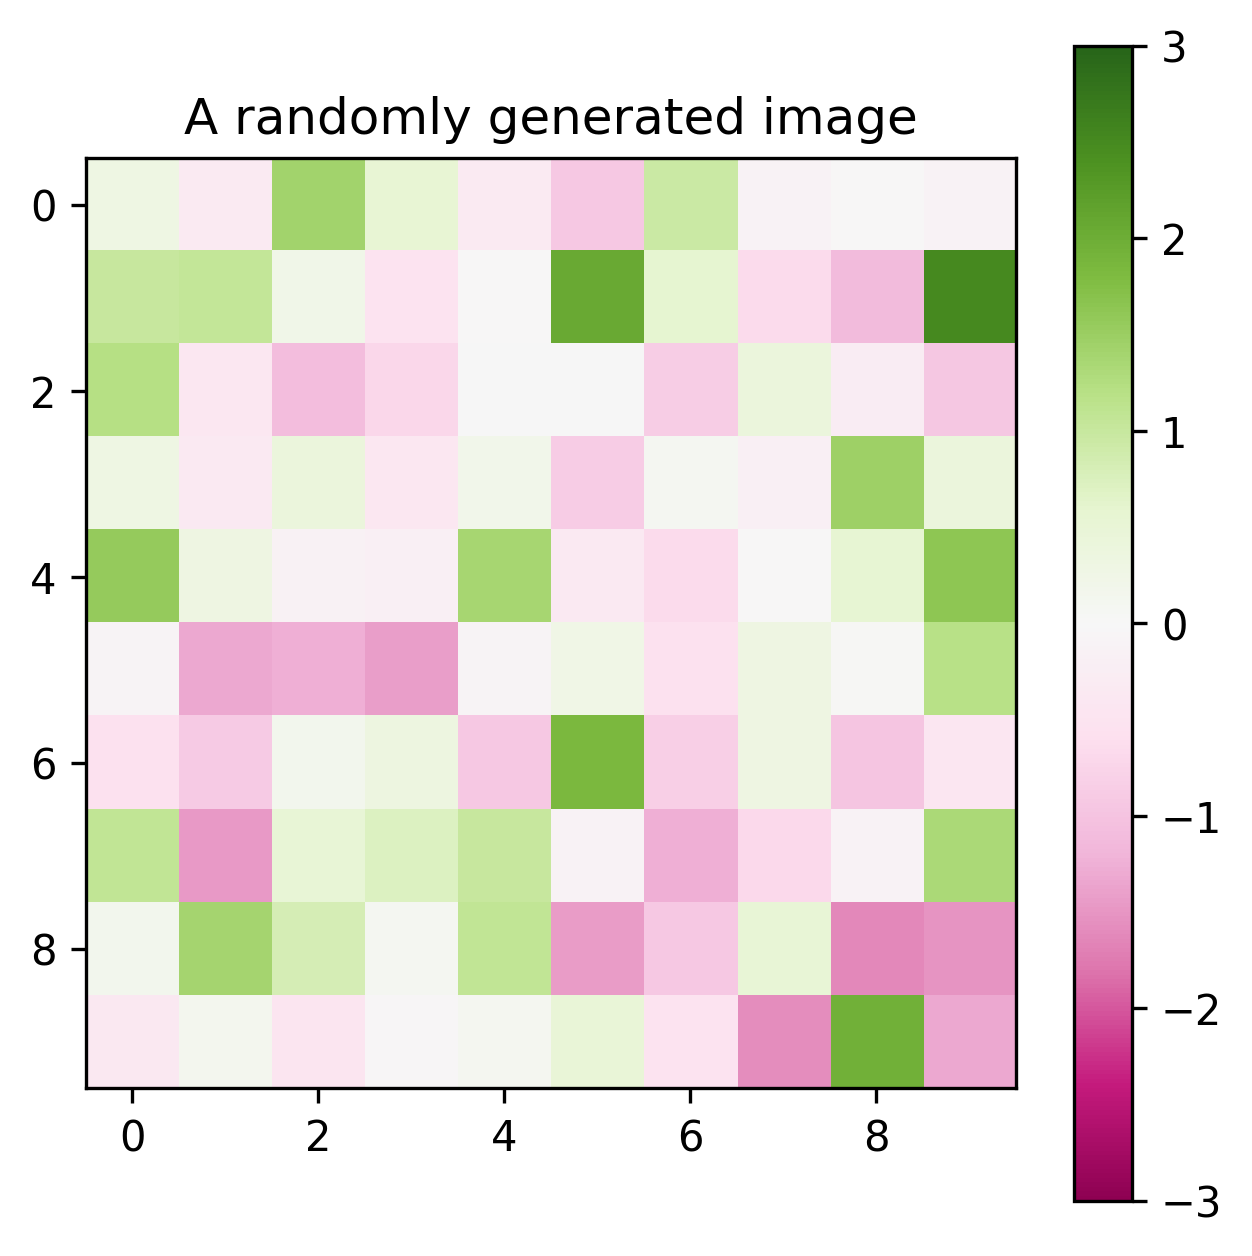

In [3]:
# Setup and Helper Code
import numpy as np
import matplotlib.pyplot as plt

# Generate some fake data
fake_image = np.random.normal(size=(10, 10))

# Make the figure
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.gca()
im_plt = ax.imshow(fake_image, cmap='PiYG', vmin=-3, vmax=3)
ax.set_title("A randomly generated image")
fig.colorbar(im_plt, ax=ax)

# Supress any returns by adding None
None

## Python Fundamentals

I presume, this being a 5000-level CS course, that all of you have a fair amount of programming experience. However, if you have never programmed in Python before, you may not be aware of some nice Python features that will help you write cleaner and faster code. I'll describe a few of these features here. Be sure to run the code blocks below (via `shift-return`) if anything is new to you so that you can see the results.

### Printing

My favorite way to print information in Python is via *f-strings*. The syntax is clear and intuitive:

In [4]:
foo = 5
bar = 1.00002

print(f"The value of 'foo' is {foo}")
print(f"The value of 'bar' is {bar}")
print(f"The value of 'bar' is {bar:0.2} (to 1 decimal place)")
print("Notice that without prepending the 'f', I cannot {escape} the string!")
print("I can print long, multi-line "
      "strings with ease.")

The value of 'foo' is 5
The value of 'bar' is 1.00002
The value of 'bar' is 1.0 (to 1 decimal place)
Notice that without prepending the 'f', I cannot {escape} the string!
I can print long, multi-line strings with ease.


### Lists and Tuples (and Sets)

Lists use square brackets, `[1, 2, 3]`, and tuples use curvy braces, `(1, 2, 3)`. The primary difference between them is that lists are mutable (and can be modified), while tuples are not (and cannot). There are a number of convenience operations for working with both. Some basic principles:

- Getting an element of lists and tuples is done via square brackets (and indexing starts at zero).
- Negative indices can be used to index *backwards* into the array, so that `some_list[-1]` will return the last element of that list.
- `len(some_list)` will return the length of a list
- Python lists and tuples support *slicing*, which allows you to get multiple list elements. `data[2:4]`, will return another list with elements `data[2]` and `data[3]` (Note that the slice is inclusive on the lower end and not inclusive on the upper end.) One can also use `data[2:]` to get all elements 2-and-up and `data[:5]` to get all elements up to (though not including) 5. Finally, `data[::2]` will return every 2nd element of `data`.

Here are some basic examples:

In [5]:
a_tuple = (1, 2, 3)  # also: tuple(data)

print(f"{a_tuple}")
print(f"{a_tuple[0]}")
print(f"{a_tuple[-1]}")
print(f"{len(a_tuple)}")

a_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # also: list(data)
print(f"Base list: {a_list}")
a_list.append(10)
print(f"After appending: {a_list}")
print(f"Slicing: {a_list[2:4]}")
print(f"Slicing: {a_list[2:]}")
print(f"Slicing: {a_list[:5]}")
print(f"Slicing (even elements): {a_list[::2]}")
print(f"Slicing (odd elements): {a_list[1::2]}")

(1, 2, 3)
1
3
3
Base list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After appending: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Slicing: [2, 3]
Slicing: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Slicing: [0, 1, 2, 3, 4]
Slicing (even elements): [0, 2, 4, 6, 8, 10]
Slicing (odd elements): [1, 3, 5, 7, 9]


We won't be using sets much in this class, but it's nice to know that they exist: they store a bunch of elements and ensure there are no repetitions. There are also set operations, like union, intersection, and difference.

In [ ]:
some_set = {1, 2, 3, 3, 3}  # also: set(data)
another_set = {3, 4, 5}

print(f"A set: {some_set}")
print(f"Set Union: {some_set.union(another_set)}")
print(f"Set Intersection: {some_set.intersection(another_set)}")
print(f"Set Difference: {some_set.difference(another_set)}")
print(f"Set Difference (again): {some_set - another_set}")

### Loops

Many types in python are *iterable* making it easy to loop over them. Here are some examples (many of which use the `a_list` defined in a previous block.

In [ ]:
print("Simple Looping:")
for el in a_list[2:5]:
    print(f"el={el}")
    
print("\n'enumerate' also gives you an index.")
print("This is faster than a C++ style list that uses the index to ... index directly.")
for ind, el in enumerate(a_list[2:5]):
    print(f"{ind}: el={el}")

print("\n'zip' allows you to merge multiple lists and loop over them.")
print("Be careful if your lists are different lengths.")
some_names = ['Leckie', 'Jemisin', 'Butler']
for el_a, el_b in zip(a_list, some_names):
    print(f"el_a = {el_a}, el_b = {el_b}")

print("\nYou can also iterate over a set (though order is not deterministic).")
for el in some_set:
    print(f"el={el}")

print("\nThe 'range' function allows you to loop over a range of numbers")
for el in range(10, 15):
    print(f"el={el}")

However, it is worth noting that using a for loop in Python is often not the best way to iterate through elements of a list. Python has *list comprehensions*, that allow you to iterate through the elements of a list in place. For example, if I wanted to make a new list comprised of the original list with 2 added to every element, there is the C++ way of doing this by using `append` to make a new list versus the Python way, using a list comprehension, which is both faster and (I think) easier to read:

In [ ]:
# C++ way
new_list_cpp = []
for el in a_list:
    new_list_cpp.append(el + 2)

print(f"new_list_cpp={new_list_cpp}")

# Pythonic way
new_list_py = [el + 2 for el in a_list]
print(f"new_list_cpp={new_list_cpp}")

### Dictionaries

Python has a built-in dictionary type, known as a `map` in C++. It takes any hashable type and returns... anything else. Here is an example:

In [ ]:
some_dictionary = {
    'a': 0,
    'b': [1, 2],
    ('a', 'b'): [3, 4, 5]
}

print("Let's get some values from the dictionary:")
print(f"  {some_dictionary['a']}")
print(f"  {some_dictionary['b']}")
print(f"  {some_dictionary[('a', 'b')]}")

> Note: tuples `('a', 'b')` are immutable (and therefore hashable), while lists `['a', 'b']` are not. Tuples can be used as a dictionary key, while lists cannot.

You can also loop over the elements in a dictionary using `some_dictionary.keys()` (getting only the keys), `some_dictionary.values()` (getting only the values), or `some_dictionary.items()`

In [ ]:
print("Print the keys:")
for k in some_dictionary.keys():
    print(f"  {k}")
    
print("Print the values:")
for v in some_dictionary.values():
    print(f"  {v}")

print("Print the items:")
for k, v in some_dictionary.items():
    print(f"  [{k}] -> {v}")

## Functions

Functions are a key way you will be writing code in this class. It might be worth pointing out that many of the tools you learn and develop earlier in the course will come up again. If you write clear functions with good documentation, it will *absolutely* save you time in the later programming assignments. Functions are simple to define in Python, and there are a number of ways you can pass arguments to them.

In [ ]:
def simple_printing_function(a, b, c):
    """Print the arguments a, b, c."""
    print("\nInside the simple printing function:")
    print(f"  a: {a}")
    print(f"  b: {b}")
    print(f"  c: {c}")

print("\nNote: a function returns 'None' when there is no return statement.")

print(f"from {simple_printing_function(1, 2, 3) }")
print(f"from {simple_printing_function(a=1, b=2, c=3)}")
print(f"from {simple_printing_function(b=1, c=2, a=3)}")
print("(It is bad practice to switch argument order.)")


def complex_printing_function(a, b=2, c=None):
    """Print the arguments a, b, c with some defaults. 
    Returns [a, b] if no value for c is passed."""
    print("\nInside the complex printing function:")
    print(f"  a: {a}")
    print(f"  b: {b}")
    if c is not None:
        print(f"  c: {c}")
    else:
        print(f"  c is None (returning a value)")
        return [a, b]
        
print(f"\nWe can also add default values:")
print(f"from {complex_printing_function(1)}")
print(f"from {complex_printing_function(a=1)}")
print(f"from {complex_printing_function(a=1)}")
print(f"from {complex_printing_function(a=1, c=5)}")

## Classes

You won't need to write many classes of your own for very much in this course, but it is helpful to understand how classes are defined, properties and methods added, and properties set. Here is a simple example:

In [ ]:
class Foo(object):
    """A simple example class."""
    
    def __init__(self, val):
        self.val = val
        
    def val_times_two(self):
        return self.val * 2
    
foo_a = Foo(5.0)
foo_b = Foo(3.0)
foo_b.val = 10.0

print("Some examples:")
print(f"  {foo_a.val}")
print(f"  {foo_a.val_times_two()}")
print(f"  {foo_b.val}")
print(f"  {foo_b.val_times_two()}")

## Numpy & Plotting

Numpy is a matrix and linear algebra library that we will be using **extensively** throughout this course. If you have never seen it before, I recommend that you go through this quickstart, which (though a bit dry) should not take you more than an hour: https://numpy.org/doc/stable/user/quickstart.html

You can run examples here:

In [ ]:
import numpy as np

# A basic example
some_values_np = np.arange(10)
print(f"{some_values_np}")
print(f"{some_values_np.sum()}")

Numpy has incredibly well-optimized functions for handling arrays and matrices of data. Here's an example of how much faster it can be to sum a number of elements using numpy:

In [ ]:
N = 10000
lpy = list(range(N))
lnp = np.arange(N)

def add_all_elements(dat):
    total = 0
    for el in dat:
        total += el
    
    return total

%timeit add_all_elements(lpy)
%timeit sum(lpy)
%timeit lnp.sum()

Besides speed, Numpy also allows you to manipulate multi-dimensional data with ease (and use Python slicing operations) and perform some linear algebra functions:

In [ ]:
# Build a data matrix via the outer product operation
data = np.outer(np.arange(7), np.arange(7))
print(f"Matrix: \n{data}")
print(f"Matrix shape: {data.shape} and size: {data.size}")
print(f"Selecting even rows: \n{data[::2]}")
print(f"Selecting even columns: \n{data[:, ::2]}")

print(f"Matrix sum: {data.sum()}")
print(f"Using * gives element-wise multiplication: \n{data * data}")
print(f"Using @ gives matrix multiplication: \n{data @ data}")
print(f"Using np.matmul gives matrix multiplication: \n{np.matmul(data, data)}")

### Plotting

There are plenty of ways to plot data, provided by `matplotlib.pyplot`. I highly recommend you take a look at some examples online as well, but here are a few to get you started:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
data = np.zeros((N, N))
data[2, 3] = -0.5
data[4:7, 5:8] = 1.0
data[5, 6] = 0.5

print(data)

fig = plt.figure(figsize=(10, 5), dpi=300)
plt.subplot(131)
plt.imshow(data)
plt.subplot(132)
plt.imshow(data, cmap='gray')
plt.subplot(133)
# Set vmin and vmax so that the 'middle' of the cmap is at zero.
plt.imshow(data, vmin=-1, vmax=1, cmap='PiYG')

None